In [1]:
%matplotlib inline

In [2]:
%run notebook_setup

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


theano version: 1.0.4


pymc3 version: 3.7


exoplanet version: 0.2.4.dev6+g2171caa


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


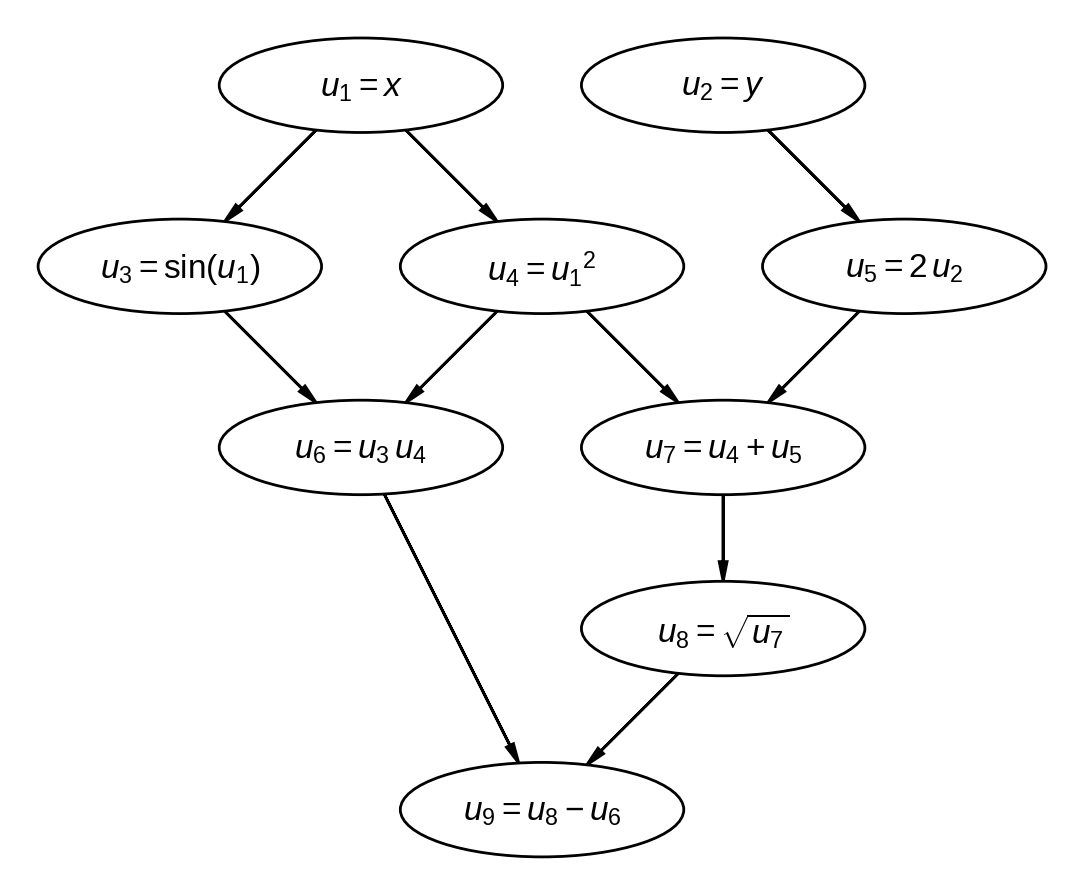

In [3]:
import daft

pgm = daft.PGM(node_unit=1.2, grid_unit=2.3, aspect=3)

kwargs = dict(offset=(0, -1), fontsize=12)

pgm.add_node("u1", r"$u_1 = x$", 1, 3, **kwargs)
pgm.add_node("u2", r"$u_2 = y$", 3, 3, **kwargs)

pgm.add_node("u3", r"$u_3 = \sin(u_1)$", 0, 2, **kwargs)
pgm.add_node("u4", r"$u_4 = {u_1}^2$", 2, 2, **kwargs)
pgm.add_node("u5", r"$u_5 = 2\,u_2$", 4, 2, **kwargs)

pgm.add_node("u6", r"$u_6 = u_3\,u_4$", 1, 1, **kwargs)
pgm.add_node("u7", r"$u_7 = u_4 + u_5$", 3, 1, **kwargs)

pgm.add_node("u8", r"$u_8 = \sqrt{u_7}$", 3, 0, **kwargs)
pgm.add_node("u9", r"$u_9 = u_8 - u_6$", 2, -1, **kwargs)

pgm.add_edge("u1", "u3")
pgm.add_edge("u1", "u4")
pgm.add_edge("u2", "u5")
pgm.add_edge("u3", "u6")
pgm.add_edge("u4", "u6")
pgm.add_edge("u4", "u7")
pgm.add_edge("u5", "u7")
pgm.add_edge("u6", "u9")
pgm.add_edge("u7", "u8")
pgm.add_edge("u8", "u9")

pgm.render()
pgm.savefig("autodiff.pdf")